In [1]:
library(ggalluvial )
library(dplyr)
library(tidyr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
#---------------------------------------------------------
#TODO 所有eGene在不同时期之间共享的比例
#---------------------------------------------------------
data=read.table("./All_eGene_acrossStage_count.txt",header=T,sep="\t")
head(data)

,X0DPA,X12DPA,X16DPA,X20DPA,X4DPA,X8DPA,counts,eGeneStage
,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>,<int>
1,eGene,eGene,eGene,eGene,eGene,eGene,2883,6
2,eGene,None,None,None,None,None,2529,1
3,None,eGene,None,None,None,None,2478,1
4,None,None,eGene,None,None,None,1108,1
5,None,None,None,None,eGene,None,1052,1
6,None,None,None,None,None,eGene,944,1


Warning message in to_lodes_form(data = data, axes = axis_ind, discern = params$discern):
“Some strata appear at multiple axes.”
Warning message in to_lodes_form(data = data, axes = axis_ind, discern = params$discern):
“Some strata appear at multiple axes.”


png 
  2

Warning message in to_lodes_form(data = data, axes = axis_ind, discern = params$discern):
“Some strata appear at multiple axes.”
Warning message in to_lodes_form(data = data, axes = axis_ind, discern = params$discern):
“Some strata appear at multiple axes.”


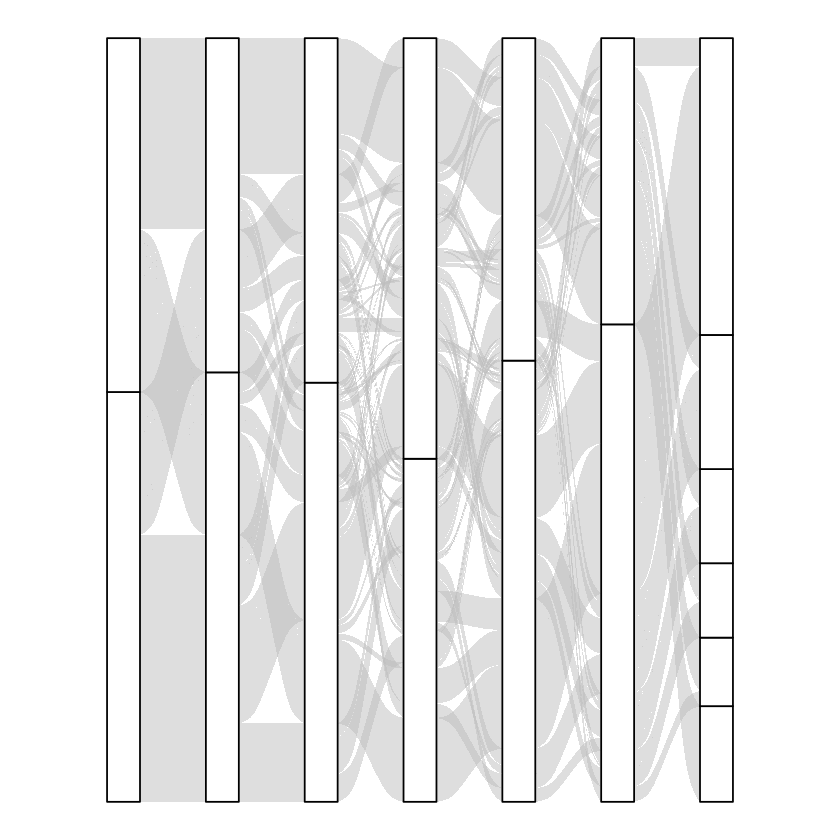

In [60]:
p=data %>% ggplot(aes(axis1=X0DPA,axis2=X4DPA,axis3=X8DPA,axis4=X12DPA,axis5=X16DPA,axis6=X20DPA,axis7=eGeneStage,y=counts))+
  scale_x_discrete(
      limits = c("0DPA", "4DPA","8DPA", "12DPA","16DPA", "20DPA",'sharing'),
      expand = c(.2,.05)
      ) +
  xlab("Demographic") +
  geom_alluvium() +
  geom_stratum()+
  theme_void()
pdf("All_eGene_dynamic.pdf",width = 5,height = 3)
print(p)
dev.off()
p

In [62]:
#------------------------------------------------
#TODO: 时期共享的eGene中只受trans调控的比例
#------------------------------------------------
shareeGene=data.frame(
    num=c(2942,11126),
    type=c("trans",'cis'),
    x=c("share","share")
)
specificGene=data.frame(
    num=c(3621,5323),
    type=c("trans",'cis'),
    x=c("specific","specific")
)

png 
  2

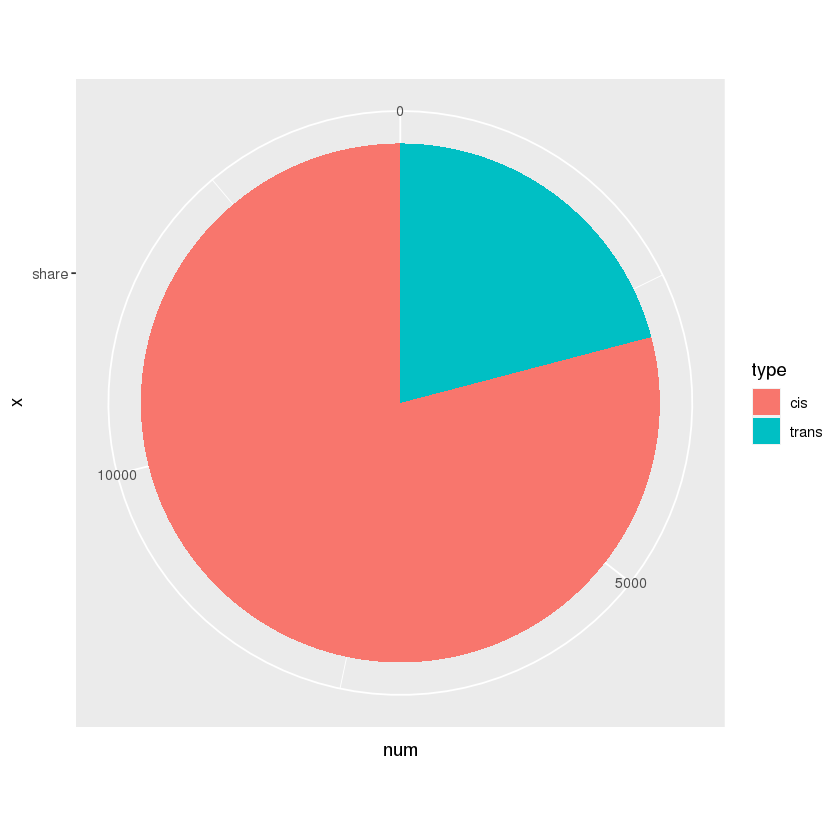

In [68]:
p=shareeGene %>% ggplot(
    aes(x = x, y = num, fill = type)
) +
    geom_bar(stat = "identity", position = "stack") +
    coord_polar(theta = "y")

pdf("share_eGene_trans_regulationCount.pdf")
print(p)
dev.off()
p

png 
  2

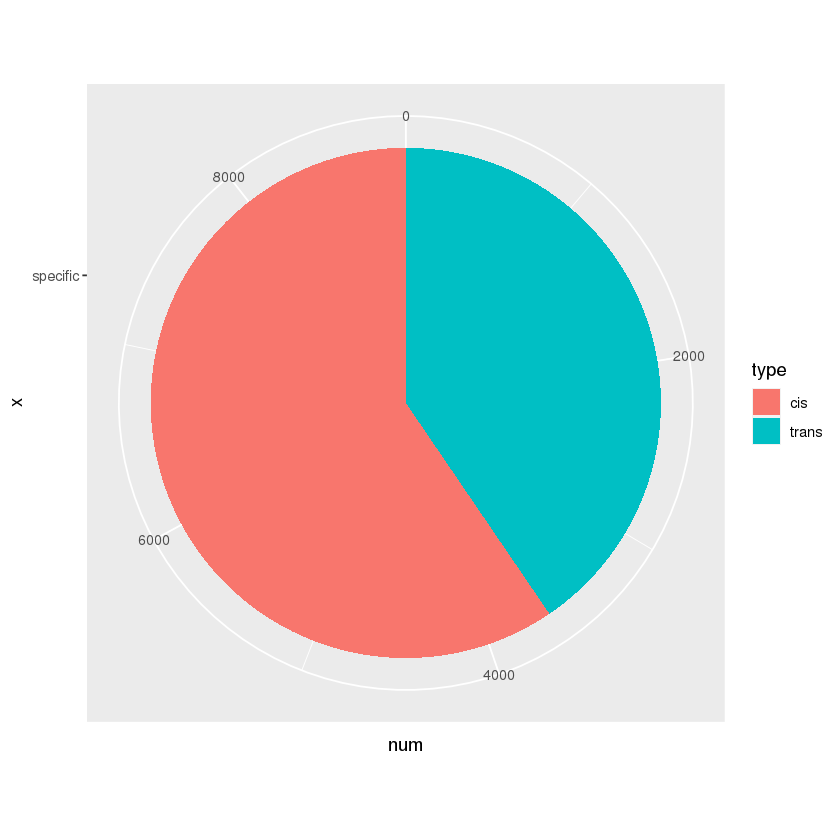

In [66]:
p=specificGene %>% ggplot(
    aes(x = x, y = num, fill = type)
) +
    geom_bar(stat = "identity", position = "stack") +
    coord_polar(theta = "y")
pdf("specific_eGene_trans_regulationCount.pdf")
print(p)
dev.off()  
p  

In [2]:
#TODO: 评估多少比例的基因在至少几个时期不表达

plotData=data.frame(
    stageCount=c(0,1,2,3,4,5,6,0,1,2,3,4,5,6),
    geneCount=c(
        12231,753,418,334,333,0,0,
        6793,556,435,452,310,398,0
    ),
    geneType=c(
        "shared","shared","shared","shared","shared","shared","shared",
        "specific","specific","specific","specific","specific","specific","specific"
        )
)


png 
  2

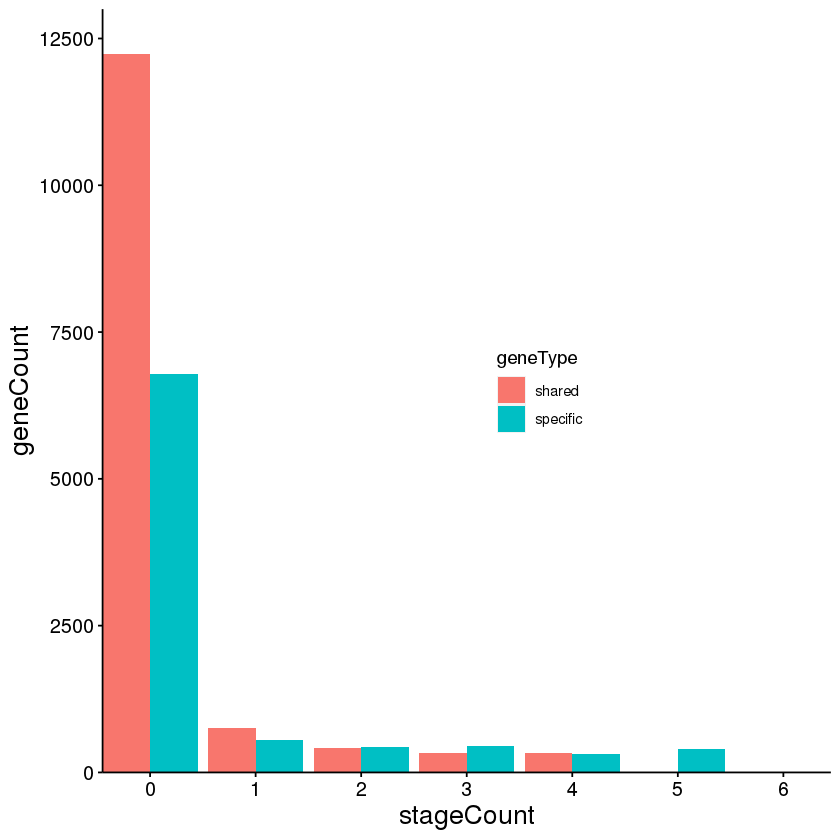

In [4]:
#* 两类基因中大部分基因在所有时期都表达
p <- plotData %>% ggplot(
    aes(x = stageCount, y = geneCount, fill = geneType)
) +
    geom_bar(
        stat = "identity", position = position_dodge()
    ) +
    base_theme +
    theme(
        panel.grid = element_blank(),
        panel.background = element_blank(),
        legend.position = c(0.6, 0.5),
    ) +
    scale_x_continuous(
        expand = c(0, 0),
        breaks = seq(0, 6)
    ) +
    scale_y_continuous(
        expand = c(0, 0),
        limits = c(0, 13000)
    )

pdf("DifferentType_expressedGeneCount.pdf")
print(p)
dev.off()
p

In [15]:
#TODO: 启动子区域SNP数目的比较
SNPCount=read.table("./promoterSNPcount_eGene.txt",header = T,sep="\t")
SNPCountPlotData=SNPCount %>% pivot_longer(
    cols = c("sharedeGene",'specificeGene'),
    values_to = "geneRatio",
    names_to = "geneType"
)
SNPCountPlotData$SNPCount <- factor(SNPCountPlotData$SNPCount, levels = c("0", "1", "2", "3", "4", "5", "6", "7", ">8"))

png 
  2

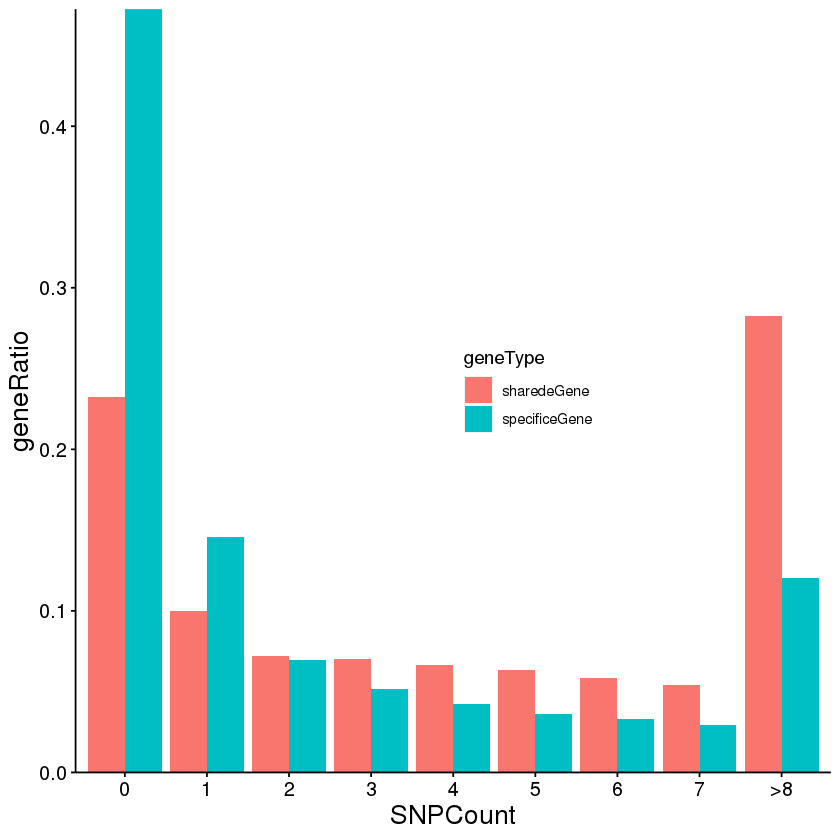

In [27]:
p=SNPCountPlotData %>% ggplot(
    aes(x = SNPCount, y = geneRatio, fill = geneType)
) +
    geom_bar(
        stat = "identity", position = position_dodge()
    ) +
    base_theme +
    theme(
        panel.grid = element_blank(),
        panel.background = element_blank(),
        legend.position = c(0.6, 0.5),
    ) +
    scale_y_continuous(
        expand = c(0, 0)
    ) 
pdf("DifferentType_SNPcount_promoter.pdf")
print(p)
dev.off()
p